# Systems and Signals 414 Practical 0: Introduction

**Aim:** To get comfortable with the Jupyter notebook and having a sneak peek at what you can accomplish with digital signal processing.

**Hand in:**  Please hand in this notebook as a PDF file on SUNLearn by Sunday, 10 February 2019 at 23:55. To save your notebook to a PDF, you can  print the notebook from your browser and then choose to `Save as PDF`. (If you are doing the practical on a machine with LaTeX, you can also select `File`$\rightarrow$ `Download as` $\rightarrow$ `PDF via LaTeX (.pdf)` directly in the notebook.) After exporting your notebook, upload the PDF by clicking on `Practical 0 submission` on SUNLearn and then follow the steps. You may submit your work multiple times; only the last submission will be marked. **No late submissions will be accepted.**

**Task:** Do the following assignment using Jupyter. If you are unfamiliar with Python or Jupyter, first go through `Guidelines.pdf` provided on SUNLearn, then proceed with this notebook. Document the task indicating your methodology, theoretical results, numerical results and discussions as necessary. Your graphs should have labeled axes with the correct units indicated. If you get stuck with a NumPy or SciPy function, consult the function's documentation at https://docs.scipy.org. Also take a look at the provided coding examples.

**Preamble code and helper functions:**

In [50]:
#All the necessary imports
%matplotlib inline
import pylab as pl
import numpy as np
from scipy import signal
import IPython.display

pl.rcParams['figure.figsize'] = (9,2)


def setup_plot(title, y_label='', x_label='', newfig=True):
    """Setup a proper plot."""
    if newfig:
        pl.figure()
    pl.margins(*(pl.array(pl.margins())+0.05))
    pl.title(title)
    pl.ylabel(y_label)
    pl.xlabel(x_label)


def download_and_load_audio(url, mono=True, factor_of_2_length=True):
    """Open or download audio and return it as an array."""
    import os
    import urllib
    import scipy.io
    from scipy.io import wavfile
    
    filename = os.path.split(url)[-1]
    #Download if path does not already exist
    if not os.path.isfile(filename):
        urllib.request.urlretrieve(url, filename)
    sample_frequency, signal_array = wavfile.read(filename)
    #Normalise signal and return
    if mono and len(signal_array.shape)==2:
        signal_array = np.sum(signal_array, axis=1)
    signal_array = signal_array/np.max([np.max(signal_array), -np.min(signal_array)])
    if factor_of_2_length:
        signal_array = signal_array[:2**np.floor(np.log2(len(signal_array))).astype('int')]
    
    return sample_frequency, signal_array

# Questions:
The full audio track used in this practical can be found here at https://www.youtube.com/watch?v=zBBtKnv0fnI. All credit goes to the magnificent film Amelie (2001)!

### Question 1

1.1) Download the audio file `noisy_amelie.wav` from  SUNLearn. Then use the provided function, `download_and_load_audio` to read the audio waveform file.
The function returns the sample frequency $F$ (as a number) and the discrete audio signal $x[n]$ (as a NumPy array).<br>
**Applicable:** `download_and_load_audio`.

1.2) Generate a corresponding time-axis (in seconds) $t[n]$ for this signal as a NumPy array. Note that the signal is sampled at a rate of $F$ (in Hz); i.e. there is a time-delay of $T=F^{-1}$ (in seconds) between each sample.<br>
**Applicable:** `np.arange` or `np.linspace`.

1.3) Plot the audio signal $x[n]$ with relation to the time-axis. Label your graph properly by making use of the provided function `setup_plot`.<br>
**Applicable:** `setup_plot` and `pl.plot`.

1.4) Use the function `IPython.lib.display.Audio` to open an inline media player window and listen to the audio signal $x[n]$. Can you hear any noise?<br>
Usage: https://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html<br>
**Applicable:** `IPython.lib.display.Audio` with keyword arguments `data` and `rate`.

### Question 2

Generate the discrete Fourier transforms $X[k]$ of the discrete signal $x[n]$ and plot the resulting spectrum via the following procedure:

2.1) Use the function `np.fft.fft` to find $X[k]$, the resulting DFT of $x[n]$.<br>
**Applicable:** `np.fft.fft`

2.2) Use the function `np.fft.fftfreq` to generate the frequency-axis $f[k]$ corresponding to $X[k]$. Similar to the fact that $x[n]$ does not inherently contain time-information (since it is only a list of samples), the DFT $X[f]$ also does not inherently contain frequency information. In order to provide useful plots, we can generate this information using `np.fft.fftfreq`.<br>
**Applicable:** `np.fft.fftfreq`, the length of the signal len($x[n]$), and the sampling period $T$ of the signal.

2.3) Plot the magnitude (`np.abs`) of the DFT $X[k]$ with relations to the frequency-axis. Label your graph properly.<br>
**Applicable:** `setup_plot`, `pl.plot` and `np.abs`.

Take a look at the spectrum. Can you see the noisy interference at $750 Hz$, $2250 Hz$, $3750 Hz$ and $5250Hz$?

### Question 3

It just so happens to be, that the unwanted noise can be filtered out by applying the following difference equation:
$$y[n] = x[n] + x[n-8] - 0.8y[n-8].$$

3.1) Apply this difference equation to the signal $x[n]$. More specifically, create an empty NumPy array $y[n]$ with the same length as our audio signal $x[n]$; use a for loop to loop over the variable $n$; and fill the values of $y[n]$ accordingly. Use the value $0$ for any element in $y[n]$ or $x[n]$ with an out-of-scope index such as $n<0$. For example,<br><br> $$y[0]= x[0] + 0 - (0.8)0,$$
$$y[1]= x[1] + 0 - (0.8)0,$$
$$\ldots,$$
$$y[18]= x[18] + x[10] - (0.8)y[10],$$
$$\ldots .$$
**Applicable:** good old fashioned programming logic.

3.2) Open an inline media player window and listen to the signal $y[n]$. Can you still hear the periodic noise?<br>
**Applicable:** `IPython.lib.display.Audio` with keyword arguments `data` and `rate`.

3.3) Provide a plot of the spectra of $y[n]$ by using the same procedure described in Question 2.<br>
**Applicable:** `np.fft.fft`, `np.fft.fftfreq`, `setup_plot`, `pl.plot` and `np.abs`.

### Bonus Question

Where did the garden gnome go?

# For your interest:
The difference equation in Question 3 represents what is known as a comb filter. The following block of code will output the frequency response of this filter with regards to a sample frequency of $12 000 Hz$, the same as with signal $x[n]$. This course will equip you with the necessary knowledge and tools to design and impliment such filters.

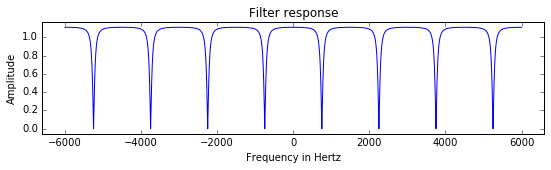

In [51]:
#Respones of the difference equation
b = [1, 0, 0, 0, 0, 0, 0, 0, 1]
a = [1, 0, 0, 0, 0, 0, 0, 0, 0.8]

_, h = signal.freqz(b, a, worN=262144,whole=True)
w = np.fft.fftfreq(262144, 1/12000)

setup_plot("Filter response", "Amplitude", "Frequency in Hertz")
pl.plot(w[:len(w)//2], np.abs(h[:len(w)//2]), 'b')
pl.plot(w[len(w)//2:], np.abs(h[len(w)//2:]), 'b');

# Coding examples:

In [52]:
#Plotting with matplotlib plot
setup_plot('Example plot', 'y_axis', 'x_axis')
pl.plot(np.arange(15), np.arange(15)**2);

In [53]:
#Audio player with Ipython.lib.display.Audio:
example_signal = np.sin(2*np.pi*500*np.linspace(0,5,50000))
IPython.lib.display.Audio(rate=10000,
                          data=example_signal)

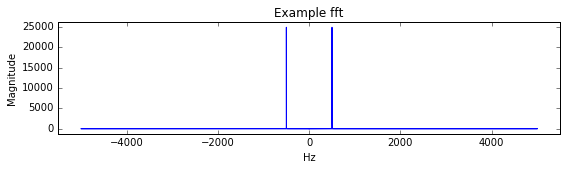

In [54]:
#Plotting the spectrum of a signal
example_fft = np.fft.fft(example_signal) 
example_hertz_axis = np.fft.fftfreq(len(example_fft), d=1/10000)

setup_plot('Example fft', 'Magnitude', 'Hz')
pl.plot(example_hertz_axis, np.abs(example_fft));

# Answer space:

# Question 1:

In [55]:
#1.1
Fs, x = download_and_load_audio("noisy_amelie.wav");

C:\Progs\WinPython-64bit-3.4.3.7\python-3.4.3.amd64\lib\site-packages\scipy\io\wavfile.py:42: WavFileWarning: Unknown wave file format
  warnings.warn("Unknown wave file format", WavFileWarning)


In [82]:
#1.2
t = np.linspace(0, (1/Fs)*len(x),len(x))

In [83]:
#1.3
setup_plot('Time plot of noisy_amelie', 'x[n]', 't')
pl.plot(t,x);

In [84]:
#1.4
IPython.lib.display.Audio(rate=Fs,data=x)
#Yes I can here the noise in the backgroud, it sounds like a sinusoidal wave.

# Question 2:

In [89]:
#2.1
Xk = np.fft.fft(x)

In [91]:
#2.2
f = np.fft.fftfreq(len(Xk),1/Fs)

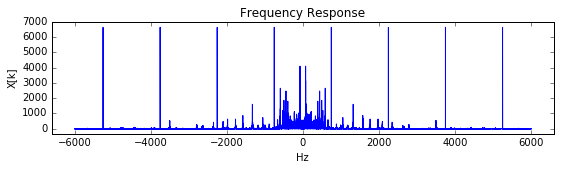

In [96]:
#2.3
setup_plot('Frequency Response','X[k]','Hz')
pl.plot(f,np.abs(Xk))
#Yes I can see the sinusoidal components

# Question 3:

In [101]:
#3.1
y = np.zeros(len(x))
for i in range(len(x)):
    if i < 8:
        y[i]=x[i]
    else:
        y[i]=x[i]+x[i-8]-0.8*y[i-8]

In [103]:
#3.2
IPython.lib.display.Audio(rate=Fs,data=y)
#No I cannot here the sinusoidal noises anymore

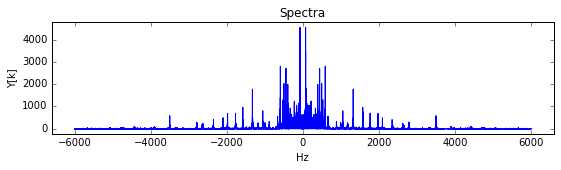

In [105]:
#3.3
Yk = np.fft.fft(y)
fy = np.fft.fftfreq(len(Yk),1/Fs)
setup_plot('Spectra','Y[k]','Hz')
pl.plot(f,np.abs(Yk))

# Bonus Question:

To the town?